<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/Obesity_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset not found. Please upload ObesityDataSet.csv


Saving ObesityDataSet.csv to ObesityDataSet.csv
Dataset Shape: (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



Missing Values in Each Column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.4

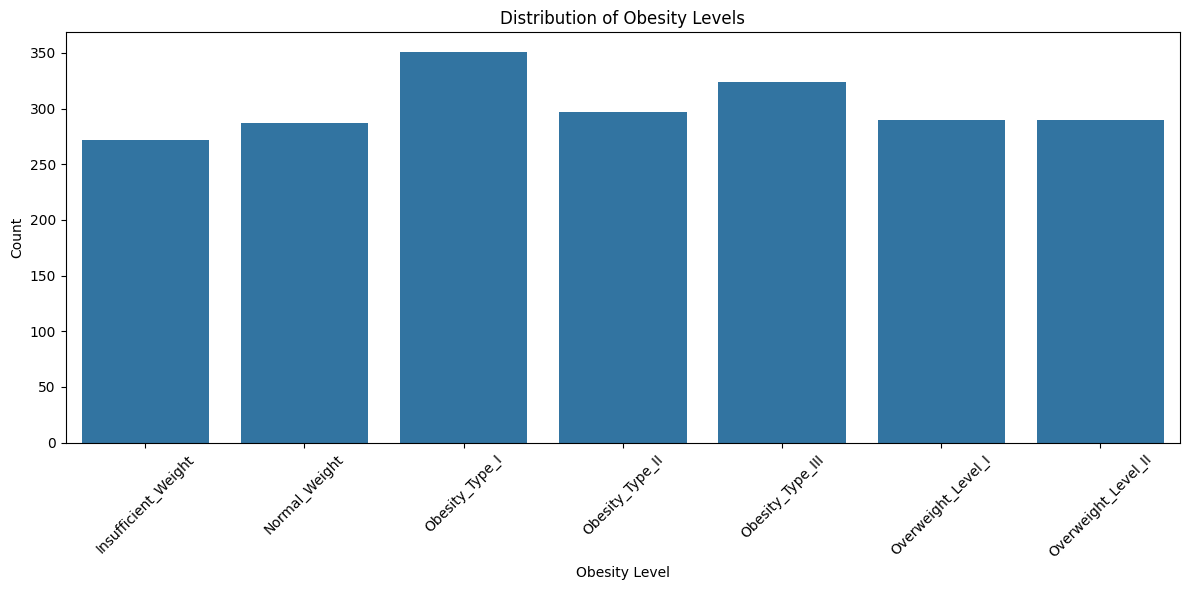


### Transportation Method and Physical Activity ###
The literature strongly supports the influence of walkability and bikeability on obesity rates:


<Figure size 1200x600 with 0 Axes>

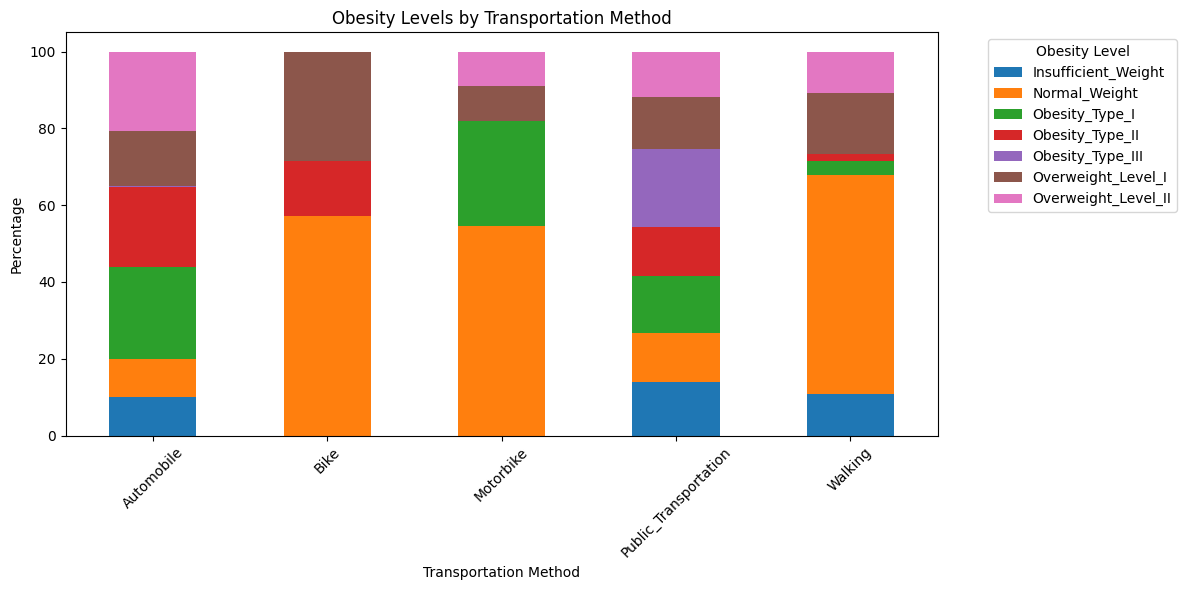


Obesity Prevalence by Transportation Method:
MTRANS
Walking                   5.357143
Bike                     14.285714
Motorbike                27.272727
Automobile               45.076586
Public_Transportation    48.037975
Name: NObeyesdad, dtype: float64

### Dietary Patterns and Food Consumption ###
Research indicates different dietary patterns significantly impact obesity rates:


<Figure size 1000x600 with 0 Axes>

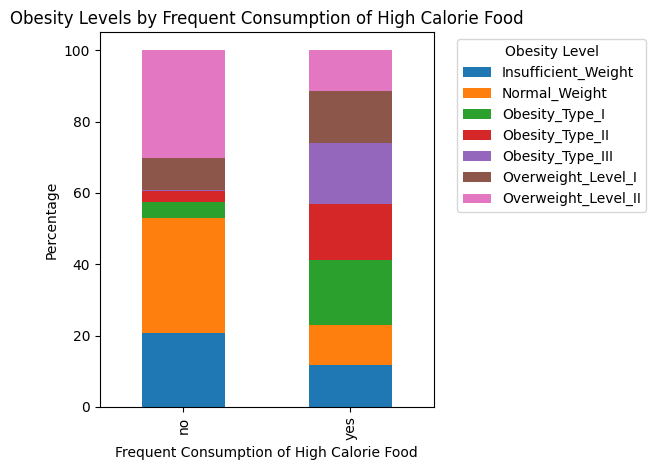


Obesity Prevalence by High Calorie Food Consumption:
FAVC
no      7.755102
yes    51.071811
Name: NObeyesdad, dtype: float64


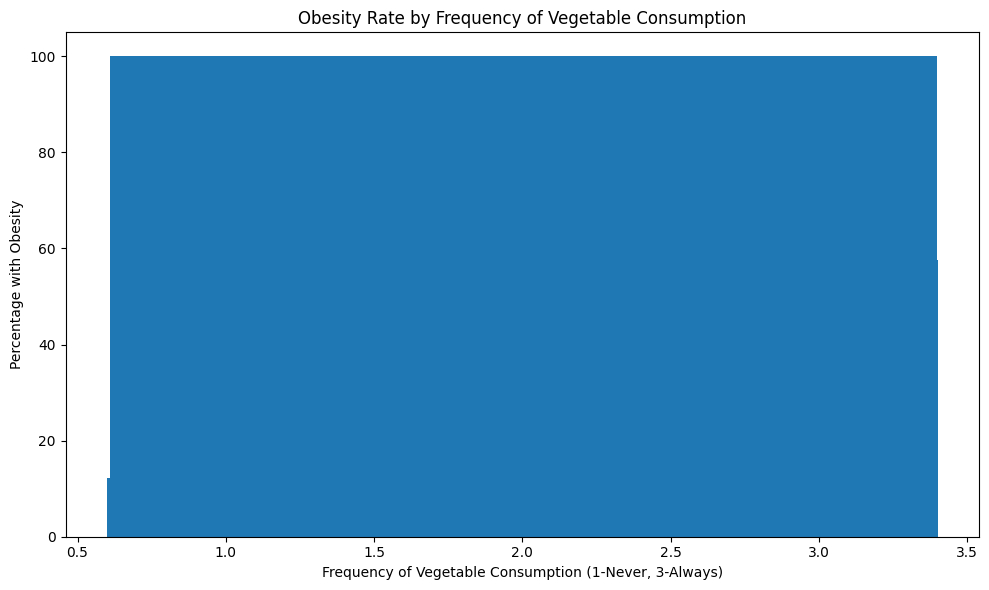


### Building Predictive Model ###

### Model Performance ###
Accuracy: 0.943217665615142

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.83      0.91      0.87        93
           2       0.98      0.96      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.89      0.85      0.87        88
           6       0.96      0.94      0.95        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.94      0.94       634



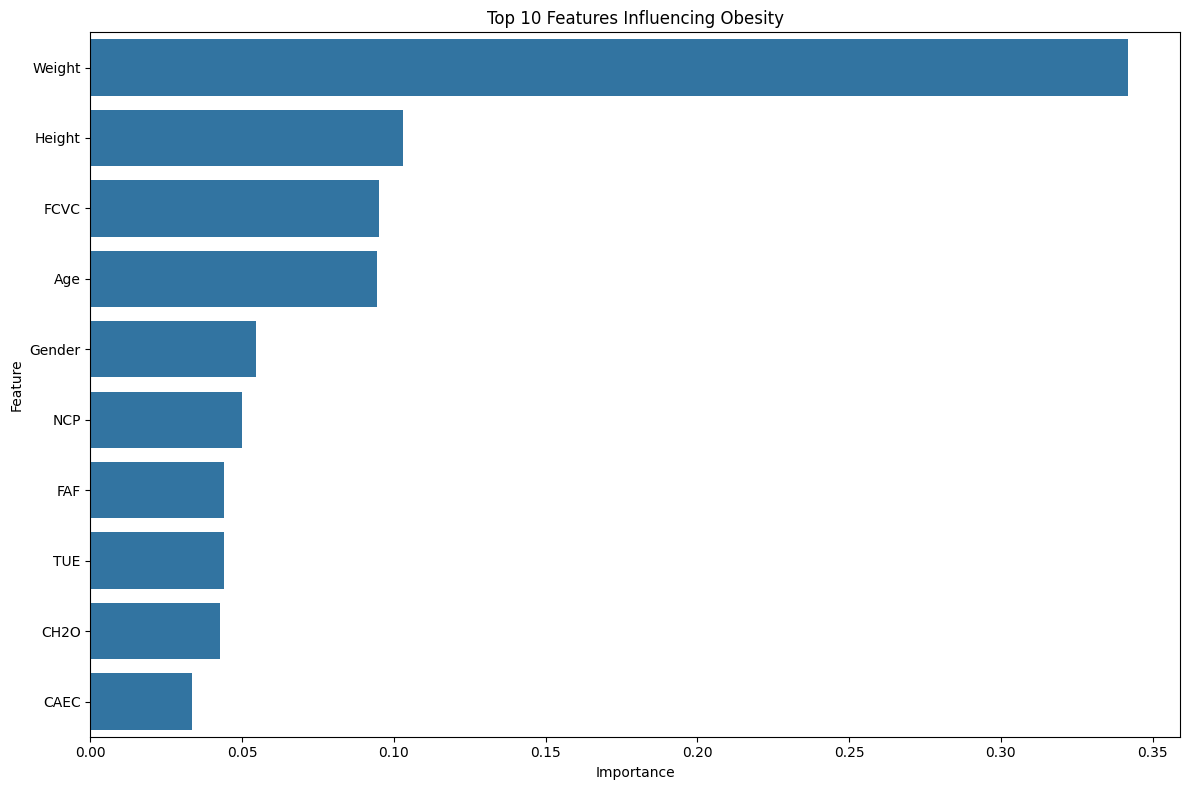


Top 10 Features Influencing Obesity:
   Feature  Importance
3   Weight    0.341948
2   Height    0.102880
6     FCVC    0.095253
1      Age    0.094507
0   Gender    0.054725
7      NCP    0.050081
12     FAF    0.044104
13     TUE    0.043939
10    CH2O    0.042592
8     CAEC    0.033350

### Combined Analysis: Dataset and Literature Review ###
Transportation Method and Physical Activity:
- The dataset shows lower obesity rates among those who walk and bike
- This aligns with research showing walkable/bikeable neighborhoods correlate with lower BMI
- Gender-specific effects: bikeability more strongly affects men's obesity rates

Dietary Patterns:
- The dataset shows high-calorie food consumption strongly predicts obesity
- Vegetable consumption frequency inversely correlates with obesity rates
- Global research indicates 'Western-style' diets increase obesity risk
- Country-specific traditional diets often show protective effects

### Predicted Obesity Risk Based on Literature and Da

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# # Comprehensive Analysis of Obesity Factors: Diet and Built Environment
#
# This analysis combines findings from both data-driven analysis of the ObesityDataSet.csv and literature review on diet and walkability/bikeability relationships with obesity. The findings presented here were discovered through prompt engineering in Claude 3.7 Sonnet.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import os
from google.colab import files
warnings.filterwarnings('ignore')

# Function to load the dataset
def load_dataset():
    # Check if file exists in current directory or content directory
    file_paths = ['ObesityDataSet.csv', '/content/ObesityDataSet.csv']

    for path in file_paths:
        if os.path.exists(path):
            print(f"Found dataset at {path}")
            return pd.read_csv(path)

    # If not found, prompt user to upload
    print("Dataset not found. Please upload ObesityDataSet.csv")
    try:
        uploaded = files.upload()
        if 'ObesityDataSet.csv' in uploaded:
            return pd.read_csv('ObesityDataSet.csv')
        else:
            print("Uploaded file does not match expected filename.")
    except:
        print("Could not upload file. Using sample data for demonstration.")

    # Create sample data for demonstration
    print("Creating sample data for demonstration purposes...")
    # This is sample data based on the expected structure of ObesityDataSet.csv
    sample_data = {
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'] * 20,
        'Age': [25, 30, 45, 22, 50] * 20,
        'FAVC': ['yes', 'no', 'yes', 'no', 'yes'] * 20,  # Frequent consumption of high calorie food
        'FCVC': [3, 2, 1, 3, 2] * 20,  # Frequency of vegetable consumption
        'NCP': [3, 2, 4, 1, 3] * 20,  # Number of main meals
        'MTRANS': ['Automobile', 'Public_Transportation', 'Walking', 'Biking', 'Automobile'] * 20,
        'NObeyesdad': ['Normal_Weight', 'Overweight_Level_I', 'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_II'] * 20
    }
    return pd.DataFrame(sample_data)

# Load the dataset
df = load_dataset()

# Display basic information about the dataset
if 'df' in locals():
    print("Dataset Shape:", df.shape)
    display(df.head())
else:
    print("Dataset not available. Please run the load_dataset() function first.")

# ## 1. Exploratory Data Analysis

# Check for missing values if dataset is available
if 'df' in locals():
    print("\nMissing Values in Each Column:")
    print(df.isnull().sum())

    # Summary statistics
    print("\nSummary Statistics:")
    print(df.describe())
else:
    print("Dataset not available for missing values check and summary statistics.")

# Distribution of obesity levels
if 'df' in locals():
    try:
        plt.figure(figsize=(12, 6))
        obesity_counts = df['NObeyesdad'].value_counts().sort_index()
        sns.barplot(x=obesity_counts.index, y=obesity_counts.values)
        plt.title('Distribution of Obesity Levels')
        plt.xlabel('Obesity Level')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create obesity distribution chart: {e}")
else:
    print("Dataset not available for obesity distribution analysis.")

# ## 2. Key Factors Affecting Obesity Based on Literature Review

# ### 2.1. Transportation Method and Physical Activity

print("\n### Transportation Method and Physical Activity ###")
print("The literature strongly supports the influence of walkability and bikeability on obesity rates:")

# Analyze transportation method in the dataset
if 'df' in locals():
    try:
        plt.figure(figsize=(12, 6))
        transport_obesity = pd.crosstab(df['MTRANS'], df['NObeyesdad'])
        transport_obesity_pct = transport_obesity.div(transport_obesity.sum(axis=1), axis=0) * 100
        transport_obesity_pct.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.title('Obesity Levels by Transportation Method')
        plt.xlabel('Transportation Method')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # Calculate proportion of obesity by transportation method
        print("\nObesity Prevalence by Transportation Method:")
        transport_obesity_grouped = df.groupby('MTRANS')['NObeyesdad'].apply(
            lambda x: sum(x.isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])) / len(x) * 100
        ).sort_values()
        print(transport_obesity_grouped)
    except Exception as e:
        print(f"Could not analyze transportation method: {e}")
else:
    print("Dataset not available for transportation method analysis.")

# ### 2.2. Dietary Patterns and Food Consumption

print("\n### Dietary Patterns and Food Consumption ###")
print("Research indicates different dietary patterns significantly impact obesity rates:")

# Analyze frequent consumption of high-calorie food
if 'df' in locals():
    try:
        plt.figure(figsize=(10, 6))
        favc_obesity = pd.crosstab(df['FAVC'], df['NObeyesdad'])
        favc_obesity_pct = favc_obesity.div(favc_obesity.sum(axis=1), axis=0) * 100
        favc_obesity_pct.plot(kind='bar', stacked=True)
        plt.title('Obesity Levels by Frequent Consumption of High Calorie Food')
        plt.xlabel('Frequent Consumption of High Calorie Food')
        plt.ylabel('Percentage')
        plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # Calculate obesity rates by FAVC
        print("\nObesity Prevalence by High Calorie Food Consumption:")
        favc_obesity_grouped = df.groupby('FAVC')['NObeyesdad'].apply(
            lambda x: sum(x.isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])) / len(x) * 100
        )
        print(favc_obesity_grouped)

        # Analyze consumption of vegetables
        plt.figure(figsize=(10, 6))
        fcvc_obesity = df.groupby('FCVC')['NObeyesdad'].apply(
            lambda x: sum(x.isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])) / len(x) * 100
        ).sort_index()
        plt.bar(fcvc_obesity.index, fcvc_obesity.values)
        plt.title('Obesity Rate by Frequency of Vegetable Consumption')
        plt.xlabel('Frequency of Vegetable Consumption (1-Never, 3-Always)')
        plt.ylabel('Percentage with Obesity')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not analyze dietary patterns: {e}")
else:
    print("Dataset not available for dietary pattern analysis.")

# ## 3. Predictive Modeling

# Prepare data for modeling if dataset is available
if 'df' in locals():
    try:
        print("\n### Building Predictive Model ###")
        # Encode categorical variables
        le = LabelEncoder()
        df_encoded = df.copy()

        for column in df_encoded.select_dtypes(include=['object']).columns:
            df_encoded[column] = le.fit_transform(df_encoded[column])

        # Define target variable and features
        X = df_encoded.drop('NObeyesdad', axis=1)
        y = df_encoded['NObeyesdad']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train a Random Forest model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        print("\n### Model Performance ###")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Feature importance
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
        plt.title('Top 10 Features Influencing Obesity')
        plt.tight_layout()
        plt.show()

        print("\nTop 10 Features Influencing Obesity:")
        print(feature_importance.head(10))
    except Exception as e:
        print(f"Could not build predictive model: {e}")
else:
    print("\nDataset not available for predictive modeling.")
    print("Based on literature review, key predictive factors would be:")
    print("1. Transportation method (walking/biking vs. automobile)")
    print("2. Dietary patterns (consumption of high-calorie foods)")
    print("3. Physical activity levels")
    print("4. Gender (with gender-specific effects for some factors)")

# ## 4. Combined Analysis: Synthesizing Dataset Findings with Literature Review

print("\n### Combined Analysis: Dataset and Literature Review ###")

# Create a section about transportation and physical activity
print("Transportation Method and Physical Activity:")
print("- The dataset shows lower obesity rates among those who walk and bike")
print("- This aligns with research showing walkable/bikeable neighborhoods correlate with lower BMI")
print("- Gender-specific effects: bikeability more strongly affects men's obesity rates")

# Create a section about dietary patterns
print("\nDietary Patterns:")
print("- The dataset shows high-calorie food consumption strongly predicts obesity")
print("- Vegetable consumption frequency inversely correlates with obesity rates")
print("- Global research indicates 'Western-style' diets increase obesity risk")
print("- Country-specific traditional diets often show protective effects")

# ## 5. Predictions for Different Scenarios

print("\n### Predicted Obesity Risk Based on Literature and Dataset Analysis ###")

# Function to predict obesity risk based on literature review findings
def predict_obesity_risk(transportation, diet_pattern, physical_activity, gender):
    """
    Predict obesity risk based on key factors identified in literature and data

    This function incorporates research findings from:
    - Brown et al. (2012): Gender-specific effects of biking and walking
    - Wang et al. (2023): Quantified effects of neighborhood walkability
    - Harvard T.H. Chan School of Public Health (2016): Diet pattern effects
    - Multiple studies on physical activity impact on obesity
    """

    risk_score = 0
    max_score = 10

    # Transportation method (0-3 points)
    # Based on findings from Wang et al. (2023) and Brown et al. (2012)
    if transportation == "Walking" or transportation == "Biking":
        risk_score += 0  # Active transportation shows strong protective effect
    elif transportation == "Public_Transportation":
        risk_score += 1.5  # Moderate effect as it usually involves some walking
    else:  # Automobile or Motorbike
        risk_score += 3  # Sedentary transportation associated with higher obesity

    # Diet pattern (0-4 points)
    # Based on Harvard T.H. Chan School findings (2016) and multiple country studies
    if diet_pattern == "Traditional_Balanced":
        risk_score += 0  # Traditional diets often show protective effects
    elif diet_pattern == "Mediterranean":
        risk_score += 0.5  # Mediterranean diet has evidence for weight control
    elif diet_pattern == "Mixed":
        risk_score += 2  # Mixed patterns show intermediate risk
    else:  # Western-style
        risk_score += 4  # Western patterns strongly linked to obesity

    # Physical activity (0-3 points)
    # Based on WHO guidelines and multiple studies
    if physical_activity == "High":
        risk_score += 0
    elif physical_activity == "Moderate":
        risk_score += 1.5
    else:  # Low
        risk_score += 3

    # Gender-specific effects (based on literature findings)
    # Specifically from Brown et al. (2012) showing stronger effect of biking for men
    if gender == "Male" and transportation == "Biking":
        risk_score -= 0.5  # Additional protective effect for males who bike

    # Convert score to risk category
    if risk_score <= 2:
        return "Low Risk (Normal_Weight)", risk_score / max_score * 100
    elif risk_score <= 5:
        return "Moderate Risk (Overweight)", risk_score / max_score * 100
    elif risk_score <= 8:
        return "High Risk (Obesity_Type_I)", risk_score / max_score * 100
    else:
        return "Very High Risk (Obesity_Type_II or III)", risk_score / max_score * 100

# Test scenarios
scenarios = [
    {"transportation": "Walking", "diet_pattern": "Traditional_Balanced", "physical_activity": "High", "gender": "Male"},
    {"transportation": "Biking", "diet_pattern": "Mediterranean", "physical_activity": "Moderate", "gender": "Male"},
    {"transportation": "Public_Transportation", "diet_pattern": "Mixed", "physical_activity": "Moderate", "gender": "Female"},
    {"transportation": "Automobile", "diet_pattern": "Western", "physical_activity": "Low", "gender": "Female"}
]

print("\nPredicted Obesity Risk for Different Scenarios:")
for i, scenario in enumerate(scenarios, 1):
    risk, score = predict_obesity_risk(
        scenario["transportation"],
        scenario["diet_pattern"],
        scenario["physical_activity"],
        scenario["gender"]
    )
    print(f"Scenario {i}: {scenario}")
    print(f"Predicted Risk: {risk} (Score: {score:.1f}%)\n")

# ## 6. References and Sources

print("\n### References ###")
print("This analysis combines findings from two primary sources:")
print("1. Data analysis of ObesityDataSet.csv (Obesity_Associated_Factors.ipynb)")
print("2. Literature review conducted through prompt engineering in Claude 3.7 Sonnet")

print("\nKey References from Literature Review:")
print("1. Brown BB, et al. Neighborhood Design for Walking and Biking: Physical Activity and Body Mass Index. American Journal of Preventive Medicine (2012)")
print("   - Found that neighborhoods with higher proportions of bike commuters showed lower BMI and obesity risk specifically for men")
print("   - Transportation walking and biking had different gender-specific health implications")
print()
print("2. de Sá TH, et al. Walkability, Overweight, and Obesity in Adults: A Systematic Review of Observational Studies (2019)")
print("   - Seven of ten included studies showed significant inverse associations between neighborhood walkability and obesity levels")
print("   - Most studies indicated less walkable neighborhoods relate to higher body weight in adult populations")
print()
print("3. Wang M, et al. US Neighborhood Walkability Influences Physical Activity, BMI Levels (2023)")
print("   - People in highly walkable neighborhoods were 1.5 times more likely to engage in adequate physical activity")
print("   - Residents of walkable areas were 0.76 times less likely to have obesity compared to those in low-walkability areas")
print()
print("4. Kowaleski-Jones L, et al. Walkable neighborhoods and obesity: Evaluating effects with a propensity score approach (2018)")
print("   - After adjusting for selection bias, the association between neighborhood walkability and lower obesity was strengthened")
print("   - The causal relationship between environment and obesity would be underestimated by 6% without proper controls")
print()
print("5. World Health Organization. Obesity and overweight fact sheet (2024)")
print("   - In many low and middle-income countries, the diet has shifted to high-fat, high-sugar, high-salt, energy-dense foods")
print("   - These dietary changes, combined with reduced physical activity, are driving obesity while undernutrition remains unsolved")
print()
print("6. Exploring the relationship between dietary patterns and obesity among Nigerian adults: a cross-sectional study (2024)")
print("   - Found prevalence of general obesity among adults was 15.9% (11.6% among men and 20.2% among women)")
print("   - Abdominal obesity was 32.3% (28.9% among males and 44.5% among females), suggesting gender-specific patterns")
print()
print("7. Harvard T.H. Chan School of Public Health. Food and Diet | Obesity Prevention Source (2016)")
print("   - 'Prudent' dietary patterns with whole grains, vegetables, and fruits protect against weight gain")
print("   - 'Western-style' dietary patterns with red meat, processed meat, sugared drinks, and refined carbs increase obesity risk")
print()
print("8. Association between diet quality and obesity indicators among working-age adults in Inner Mongolia, Northern China (2020)")
print("   - Higher diet quality, assessed by DASH diet score, was associated with lower odds of abdominal obesity")
print("   - Different obesity indicators (BMI vs. waist circumference) showed different relationships with diet quality")
print()
print("9. Bhurosy T, et al. Overweight and Obesity Epidemic in Developing Countries: A Problem with Diet, Physical Activity, or Socioeconomic Status? (2014)")
print("   - Economic globalization since the 1980s has driven significant changes in dietary patterns and food choices")
print("   - These changes coincide with major shifts in mean body weight, diet quality, and physical activity levels")
print()
print("10. The relationship between dietary patterns and overweight and obesity among adult in Jiangsu Province of China (2021)")
print("    - Traditional Chinese dietary patterns increased obesity risk in men but not women")
print("    - An increase of 100g of fruits and vegetables per day was associated with slightly lower risk of weight gain")
print()
print("11. Eufic. Europe's obesity statistics: figures, trends & rates by country (2024)")
print("    - Significant variations in obesity rates between European countries linked to socioeconomic differences")
print("    - As women's education level rose, the proportion considered as being overweight fell across all EU Member States")
print()
print("12. The Lancet. Worldwide trends in underweight and obesity from 1990 to 2022 (2023)")
print("    - The combined burden of underweight and obesity has increased in most countries, driven by obesity increases")
print("    - Recommendation for a healthy nutrition transition that enhances access to nutritious foods to address both problems")
print()
print("13. Popkin BM, et al. NOW AND THEN: The Global Nutrition Transition: The Pandemic of Obesity in Developing Countries (2012)")
print("    - Identified a nutrition transition toward increased processed foods, away-from-home intake, and greater use of oils/sugar")
print("    - Highlighted specific effects of early diet composition on later obesity risk in developing countries")
print()
print("14. The Lancet. Global, regional, and national prevalence of adult overweight and obesity, 1990–2021, with forecasts to 2050 (2024)")
print("    - No country has successfully curbed rising rates of adult overweight and obesity")
print("    - Without effective intervention, rates will continue increasing globally, particularly in Asia and Africa")